# Pytorch
Ejemplo de clasificador con Pytorch, comentado en español. 

El cuaderno de Jupyter se ha desarrollado con Visual Code y puedes encontrar el código en https://github.com/josegemez/pytorch_mnist 

Se ha desarrollado en python 3.10.4 

## Import
Con las primeras lineas vamos a importar los paquetes que básicos de Pytorch. 

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np

## Variables Generales

In [2]:
batch_size_train = 4
batch_size_test = 4

## Transformaciones 

In [3]:
transforms=torchvision.transforms.Compose([
                            torchvision.transforms.ToTensor(),
                            torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) #media y desviacion estandar para el dataset de cifar en concreto
                            ])

## Dataset 

In [4]:
dataset_cifar_train = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms)  #descarga el dataset de pytorch                  

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data\cifar-10-python.tar.gz to ./data


## Dataloader

In [5]:
train_loader = torch.utils.data.DataLoader(dataset_cifar_train,  batch_size=batch_size_train, shuffle=True,num_workers=0,pin_memory=True) #cargador de los datos en batch de entrenamiento

In [6]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Vamos a ver que "pinta" tiene cada elemento del cargador

In [7]:
x, y = next(iter(train_loader)) #asignamos el primer batch a las variables x e y. La variable X contrendra las imagenes e y contrendra las etiquetas

x es un batch, por lo que la primera dimensión coincidira con el batch size 

In [8]:
from matplotlib.pyplot import imshow

In [9]:
img0 = x[0].numpy()
img0 = img0/ 2 + 0.5 #para quitar la normalizacion que hemos hecho antes con los transform

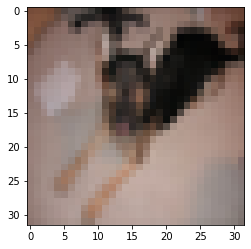

In [10]:
imshow(np.transpose(img0, (1, 2, 0))); # transformamos el primer elemento del batch una matriz de numpy y mostramos con matplotlib

In [11]:
x #comprobamos los datos

tensor([[[[-0.0745, -0.0510, -0.0588,  ..., -0.1529, -0.1765, -0.2000],
          [-0.0196, -0.0039, -0.0196,  ..., -0.0667, -0.1451, -0.1843],
          [ 0.0039, -0.0118, -0.1059,  ..., -0.1529, -0.3961, -0.4824],
          ...,
          [ 0.1529,  0.1843,  0.2314,  ...,  0.1373,  0.0745,  0.0118],
          [ 0.1373,  0.1922,  0.2392,  ...,  0.1373,  0.0745,  0.0039],
          [ 0.0980,  0.1451,  0.2000,  ...,  0.0824,  0.0431, -0.0353]],

         [[-0.4039, -0.3882, -0.3804,  ..., -0.4431, -0.4667, -0.4824],
          [-0.3647, -0.3490, -0.3490,  ..., -0.3569, -0.4275, -0.4667],
          [-0.3412, -0.3490, -0.4039,  ..., -0.4588, -0.6392, -0.6706],
          ...,
          [-0.0275,  0.0118,  0.0667,  ...,  0.0588, -0.0118, -0.0667],
          [-0.0431,  0.0118,  0.0745,  ...,  0.0588,  0.0039, -0.0824],
          [-0.0824, -0.0275,  0.0275,  ...,  0.0118, -0.0275, -0.1137]],

         [[-0.5451, -0.5373, -0.5451,  ..., -0.5294, -0.5686, -0.5843],
          [-0.5137, -0.5137, -

In [12]:
y #comprobamos las etiquetas

tensor([5, 4, 5, 6])

## Dataset Test

In [13]:
dataset_cifar_test = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transforms)  #descarga el dataset de pytorch    

Files already downloaded and verified


In [14]:
test_loader = torch.utils.data.DataLoader(dataset_cifar_test,  batch_size=batch_size_test, shuffle=True, num_workers=0,pin_memory=True)              

Ya tenemos los datos preparados, ahora vamos a crear la red

In [15]:
learning_rate   =   0.001
momentum   =   0.9
n_epochs = 20

In [16]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from tqdm import tqdm
import numpy as np

## MLP

In [17]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        n_hidden1 = 128
        n_hidden2 = 64
        self.fc1 = nn.Linear(28*28,n_hidden1) #capa "fuly connect" entrada 28*28 (tamaño de la imagen) 50 neuronas
        self.fc1_drop = nn.Dropout(0.2) #dropout (regularizacion) 20% 
        self.fc2 = nn.Linear(n_hidden1, n_hidden2) #capa fully connect 50 neuronas 
        self.fc2_drop = nn.Dropout(0.2) #dropout (regularizacion) 20%
        self.fc3 = nn.Linear(n_hidden2, 10) #capa de salida numero de salida igual al de etiquetas

    def forward(self, x):
        x = x.view(-1, 28*28) #cambia la forma del tensor, -1 para quitar la dimensiones anteriores y dejarlo todo en una vector de 256 elementos
        x = F.relu(self.fc1(x)) #capa fully connect y luego activacion relu
        x = self.fc1_drop(x) #dropout (regularizacion)
        x = F.relu(self.fc2(x)) #capa fully connect y luego activacion relu
        x = self.fc2_drop(x) #dropout (regularizacion)
        x = self.fc3(x)
        return F.log_softmax(x, dim=1) #soft max (estimacion estadistica 0-1 de la probabildad de que sea de un etiqueta u otra)
    
    
    

## Convolutional

Recuerda que para calcular la dimensión del output de cada capa convolucional debes tener en cuenta esta regla. 

<img src="./images/output_size.png" alt="Drawing" style="width: 400px;"/>

Por ejemplo en la primera **convolucion** tenemos:

K (kernels = 5)
Pading = 0
Stride = 1
(32-5+0)+1 = 27 + 1 = 28

Las capas de **pooling** dividen la entrada (pooling 2 divide por 2)


In [46]:
class Net(nn.Module):
    
  def __init__(self):
    super(Net, self).__init__()  # pre Python 3.3 syntax

    self.conv1 = nn.Conv2d(3, 32, 5)  # chnl-in, out, krnl
    self.conv2 = nn.Conv2d(32, 64, 5)
    self.fc1 = nn.Linear(64*5*5, 512)   # [64*4*4, x]
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)     # 10 classes
    self.pool1 = nn.MaxPool2d(2, stride=2)
    self.pool2 = nn.MaxPool2d(2, stride=2)
    self.drop1 = nn.Dropout(0.25)
    self.drop2 = nn.Dropout(0.50)

  def forward(self, x):
      # convolution phase         # x is [bs, 3, 32, 32]
      z = F.relu(self.conv1(x))   # Size([bs, 32, 28, 28])
      z = self.pool1(z)           # Size([bs, 32, 14, 14])
      z = self.drop1(z)
      z = F.relu(self.conv2(z))   # Size([bs, 64, 10, 10])
      z = self.pool2(z)           # Size([bs, 64, 5, 5])

      # neural network phase
      z = z.reshape(-1, 64*5*5)     # Size([bs, 1024])
      z = F.relu(self.fc1(z))     # Size([bs, 512])
      z = self.drop2(z)
      z = F.relu(self.fc2(z))     # Size([bs, 256])
      z = self.fc3(z)             # Size([bs, 10])
      return z

In [35]:
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cuda')
device

device(type='cuda')

In [47]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate,
                      momentum=momentum)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=2, gamma=0.5)
criterion =  nn.CrossEntropyLoss().to(device)


In [37]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [30]:
count_parameters(model)

712394

In [48]:
model

Net(
  (conv1): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=1600, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop1): Dropout(p=0.25, inplace=False)
  (drop2): Dropout(p=0.5, inplace=False)
)

In [32]:
import time

def train(model, optimizer, loss_fn, train_dl, val_dl, epochs=20, device='cuda'):
    '''
    Runs training loop for classification problems. Returns Keras-style
    per-epoch history of loss and accuracy over training and validation data.

    Parametros
    ----------
    model : nn.Module
        Neural network model
    optimizer : torch.optim.Optimizer
        Search space optimizer (e.g. Adam)
    loss_fn :
        Funcion de perdida (e.g. nn.CrossEntropyLoss())
    train_dl : 
        Dataloader para los datos de entrenamiento.
    val_dl :
        Dataloader para los datos de validacion.
    epochs : int
        Numero de epocas
    device : string
        'cuda' para entrenamiento en gpu y 'cpu' para entrenamiento en cpu

    Retorno
    -------
    Diccionario
        Similar to Keras' fit(), the output dictionary contains per-epoch
        history of training loss, training accuracy, validation loss, and
        validation accuracy.
    '''

    print('train() called: model=%s, opt=%s(lr=%f), epochs=%d, device=%s\n' % \
          (type(model).__name__, type(optimizer).__name__,
           optimizer.param_groups[0]['lr'], epochs, device))

    history = {} # Collects per-epoch loss and acc like Keras' fit().
    history['loss'] = []
    history['val_loss'] = []
    history['acc'] = []
    history['val_acc'] = []

    start_time_sec = time.time()

    for epoch in range(epochs):

        # --- Entrenamiento en los datos de entrenamientos -----------------------------
        model.train() #modelo en forma de entrenamiento    
        train_loss         = 0.0 #perdida inicializada en cero
        num_train_correct  = 0 #numero de elementos donde la prediccion coincide con la etiqueta "true positive"
        num_train_examples = 0 #inicializa el numero de elementos sobre los que se ha realizado entrenamiento

        for batch in train_dl:

            optimizer.zero_grad() #pone los gradientes a cero

            x    = batch[0].to(device) #datos al dispositivo (cpu o gpu)
            y    = batch[1].to(device) #idem
            yhat = model(x) # y predichos 
            loss = loss_fn(yhat, y) #calcula la perdida entre los "y predichos" y los "y etiquetas"

            loss.backward() #retropropagación
            optimizer.step() #se mueve el gradiente un paso (learning rate por el gradiente negativo)

            train_loss         += loss.data.item() * x.size(0) 
            num_train_correct  += (torch.max(yhat, 1)[1] == y).sum().item() #compureba los elementos correctos
            num_train_examples += x.shape[0]

        train_acc   = num_train_correct / num_train_examples
        train_loss  = train_loss / len(train_dl.dataset)


        # --- Evaluacion en los datos de test -------------------------------------
        model.eval() #capas de droput y normalizacion apagadas
        val_loss       = 0.0
        num_val_correct  = 0
        num_val_examples = 0

        for batch in val_dl:
            with torch.no_grad(): #gradiente desactivados (menos memoria mas rapido)
                x    = batch[0].to(device)
                y    = batch[1].to(device)
                yhat = model(x)
                loss = loss_fn(yhat, y)

                val_loss         += loss.data.item() * x.size(0)
                num_val_correct  += (torch.max(yhat, 1)[1] == y).sum().item()
                num_val_examples += y.shape[0]

        val_acc  = num_val_correct / num_val_examples
        val_loss = val_loss / len(val_dl.dataset)


        print('Epoch %3d/%3d, train loss: %5.2f, train acc: %5.2f, val loss: %5.2f, val acc: %5.2f' % \
              (epoch+1, epochs, train_loss, train_acc, val_loss, val_acc))

        history['loss'].append(train_loss)
        history['val_loss'].append(val_loss)
        history['acc'].append(train_acc)
        history['val_acc'].append(val_acc)

    # END OF TRAINING LOOP


    end_time_sec       = time.time()
    total_time_sec     = end_time_sec - start_time_sec
    time_per_epoch_sec = total_time_sec / epochs
    print()
    print('Time total:     %5.2f sec' % (total_time_sec))
    print('Time per epoch: %5.2f sec' % (time_per_epoch_sec))

    return history

In [49]:
history = train(model,optimizer,criterion, train_loader, test_loader, n_epochs, 'cuda')

train() called: model=Net, opt=SGD(lr=0.001000), epochs=20, device=cuda

Epoch   1/ 20, train loss:  1.63, train acc:  0.40, val loss:  1.29, val acc:  0.54
Epoch   2/ 20, train loss:  1.22, train acc:  0.57, val loss:  1.09, val acc:  0.61
Epoch   3/ 20, train loss:  1.04, train acc:  0.64, val loss:  0.99, val acc:  0.65
Epoch   4/ 20, train loss:  0.93, train acc:  0.68, val loss:  0.88, val acc:  0.70
Epoch   5/ 20, train loss:  0.85, train acc:  0.70, val loss:  0.83, val acc:  0.72
Epoch   6/ 20, train loss:  0.79, train acc:  0.73, val loss:  0.78, val acc:  0.73
Epoch   7/ 20, train loss:  0.74, train acc:  0.74, val loss:  0.81, val acc:  0.72
Epoch   8/ 20, train loss:  0.69, train acc:  0.76, val loss:  0.78, val acc:  0.74
Epoch   9/ 20, train loss:  0.65, train acc:  0.77, val loss:  0.77, val acc:  0.73
Epoch  10/ 20, train loss:  0.62, train acc:  0.78, val loss:  0.77, val acc:  0.74
Epoch  11/ 20, train loss:  0.59, train acc:  0.79, val loss:  0.75, val acc:  0.75
Epo

In [ ]:
torch.save(model.state_dict(), 'results/model.pth')
torch.save(optimizer.state_dict(), 'results/optimizer.pth')

In [50]:
model.load_state_dict(torch.load('results/model.pth'))
model.eval()

RuntimeError: Error(s) in loading state_dict for Net:
	Missing key(s) in state_dict: "fc3.weight", "fc3.bias". 
	size mismatch for conv1.weight: copying a param with shape torch.Size([10, 1, 5, 5]) from checkpoint, the shape in current model is torch.Size([32, 3, 5, 5]).
	size mismatch for conv1.bias: copying a param with shape torch.Size([10]) from checkpoint, the shape in current model is torch.Size([32]).
	size mismatch for conv2.weight: copying a param with shape torch.Size([20, 10, 5, 5]) from checkpoint, the shape in current model is torch.Size([64, 32, 5, 5]).
	size mismatch for conv2.bias: copying a param with shape torch.Size([20]) from checkpoint, the shape in current model is torch.Size([64]).
	size mismatch for fc1.weight: copying a param with shape torch.Size([50, 320]) from checkpoint, the shape in current model is torch.Size([512, 1600]).
	size mismatch for fc1.bias: copying a param with shape torch.Size([50]) from checkpoint, the shape in current model is torch.Size([512]).
	size mismatch for fc2.weight: copying a param with shape torch.Size([10, 50]) from checkpoint, the shape in current model is torch.Size([256, 512]).
	size mismatch for fc2.bias: copying a param with shape torch.Size([10]) from checkpoint, the shape in current model is torch.Size([256]).

In [51]:
import matplotlib.pyplot as plt

(0.0, 3.0)

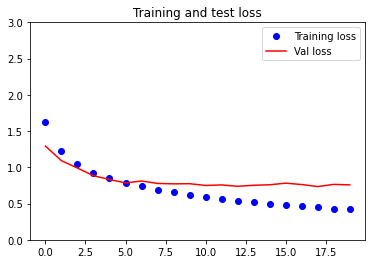

In [52]:
fig = plt.figure()
plt.plot(range(len(history['loss'])), history['loss'], 'bo', label='Training loss')
plt.plot(range(len(history['val_loss'])), history['val_loss'], c="red",label='Val loss')
plt.title('Training and test loss')
plt.legend()
plt.ylim([0, 3])

(0.0, 1.0)

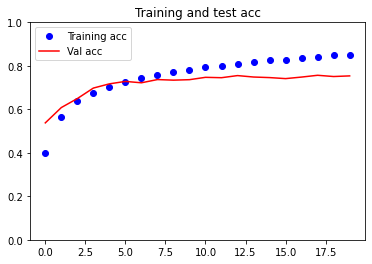

In [53]:
fig = plt.figure()
plt.plot(range(len(history['acc'])), history['acc'], 'bo', label='Training acc')
plt.plot(range(len(history['val_acc'])), history['val_acc'], c="red",label='Val acc')
plt.title('Training and test acc')
plt.legend()
plt.ylim([0, 1])